In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import time
import utils
from utils import *
import os
import importlib
import argparse
import trader  
import matplotlib.pyplot as plt
from trendline_automation import *

binance = get_binance()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
tf = "15m"
sym = "BTC/USDT"
limit = 1500
df = await past_data(binance, sym, tf, limit)

In [86]:
# t_block = 100
# imgname = 0
# for t in range(t_block, limit, 10):
#     t_df = df[t - t_block: t]
#     save_trendline_img(t_df, imgname)
#     imgname += 1
    

In [87]:
from wedge import *

In [88]:
df.index = df.apply(lambda x: int(x.name.timestamp()), axis=1)
df.reset_index(drop=False, inplace=True)

In [89]:
df

,index,open,high,low,close,volume
0,1727111700,63180.1,63220.0,63113.1,63202.5,1006.711
1,1727112600,63202.4,63318.3,63150.0,63150.7,1606.065
2,1727113500,63150.7,63306.9,63150.6,63291.0,768.916
3,1727114400,63290.9,63439.7,63247.4,63375.6,1587.673
4,1727115300,63375.6,63444.0,63345.6,63384.5,990.098
...,...,...,...,...,...,...
1495,1728457200,62405.1,62405.1,62181.2,62193.0,1716.286
1496,1728458100,62193.0,62248.5,62164.7,62233.9,1037.137
1497,1728459000,62233.8,62289.9,62200.2,62254.2,557.124
1498,1728459900,62254.1,62281.1,62220.0,62243.0,476.484


-3
-2
-1
1500
1500
1500


/home/nhkim/anaconda3/envs/ldm/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/nhkim/anaconda3/envs/ldm/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/nhkim/anaconda3/envs/ldm/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Completed 12.0%
Completed 25.0%
Completed 38.0%
Completed 50.0%
Completed 62.0%
Completed 75.0%
Completed 88.0%
Completed 100.0%


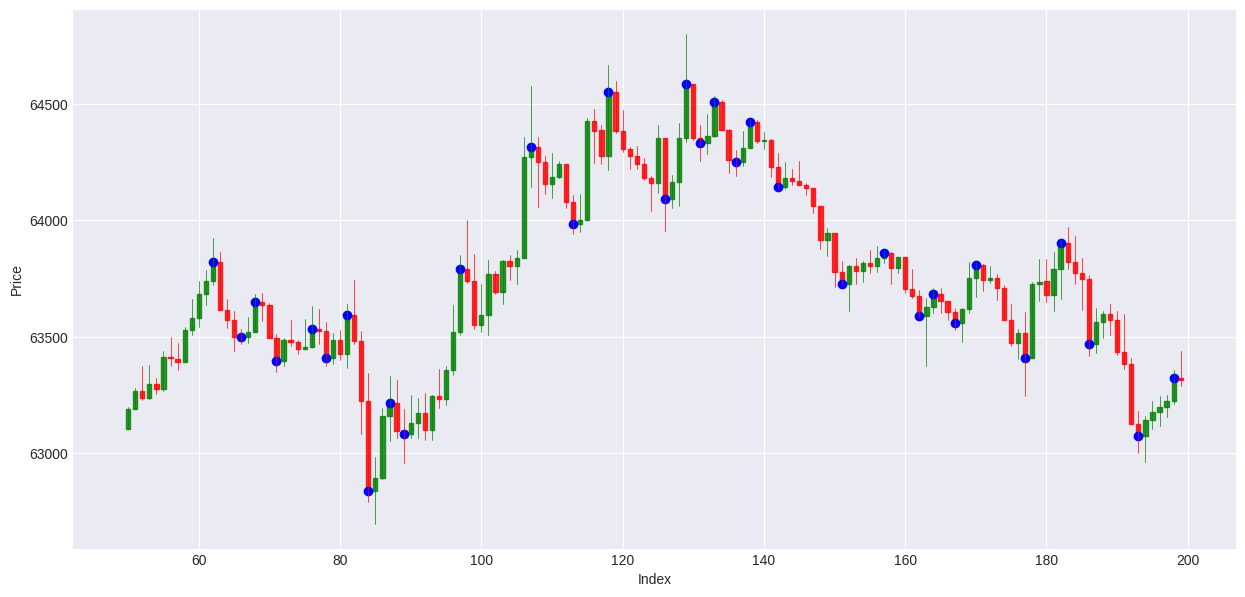

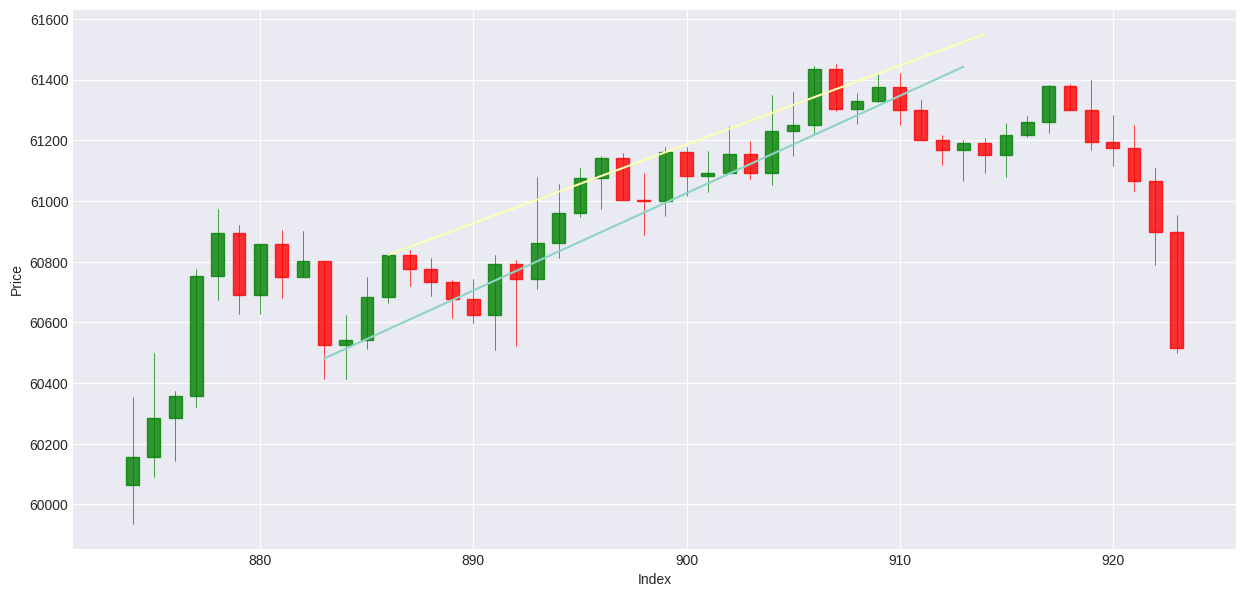

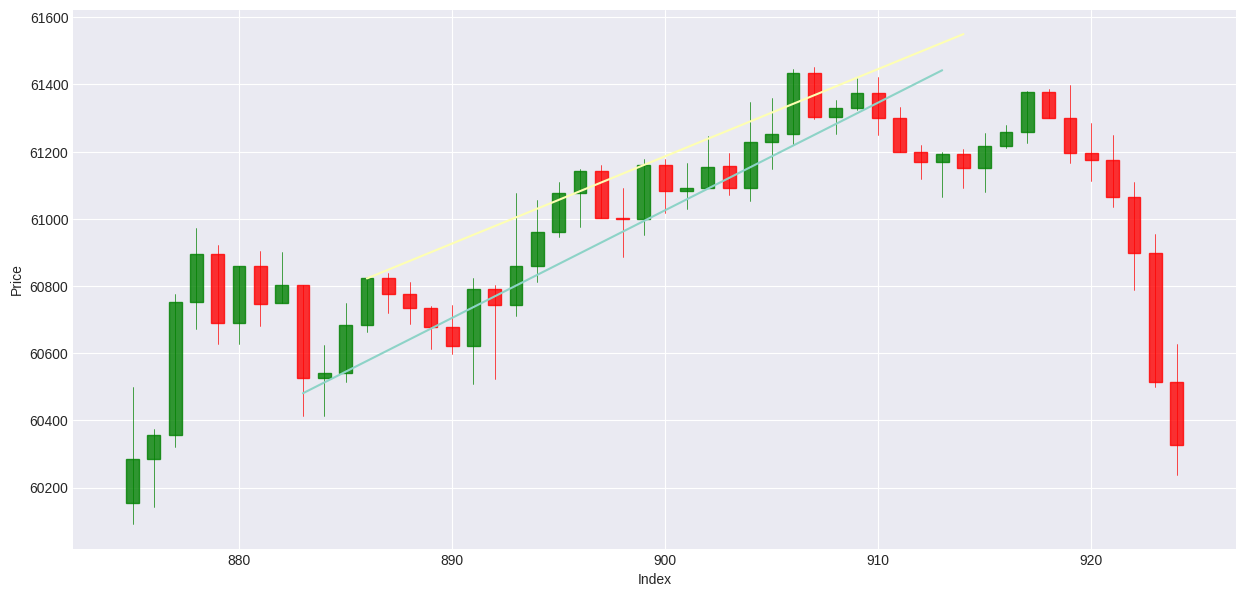

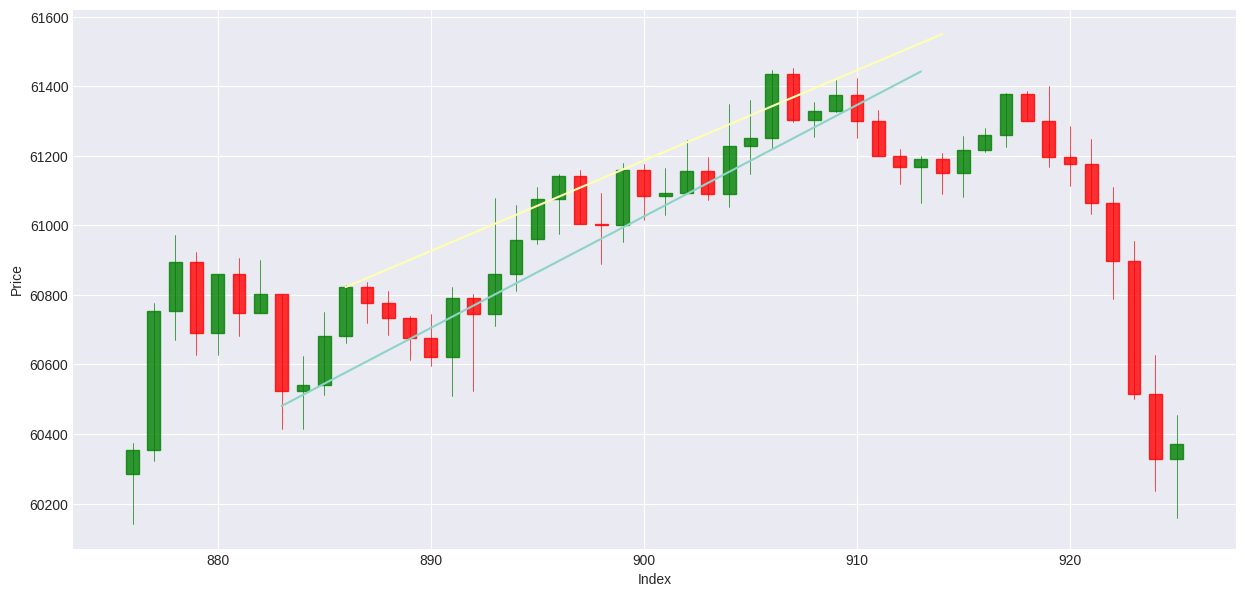

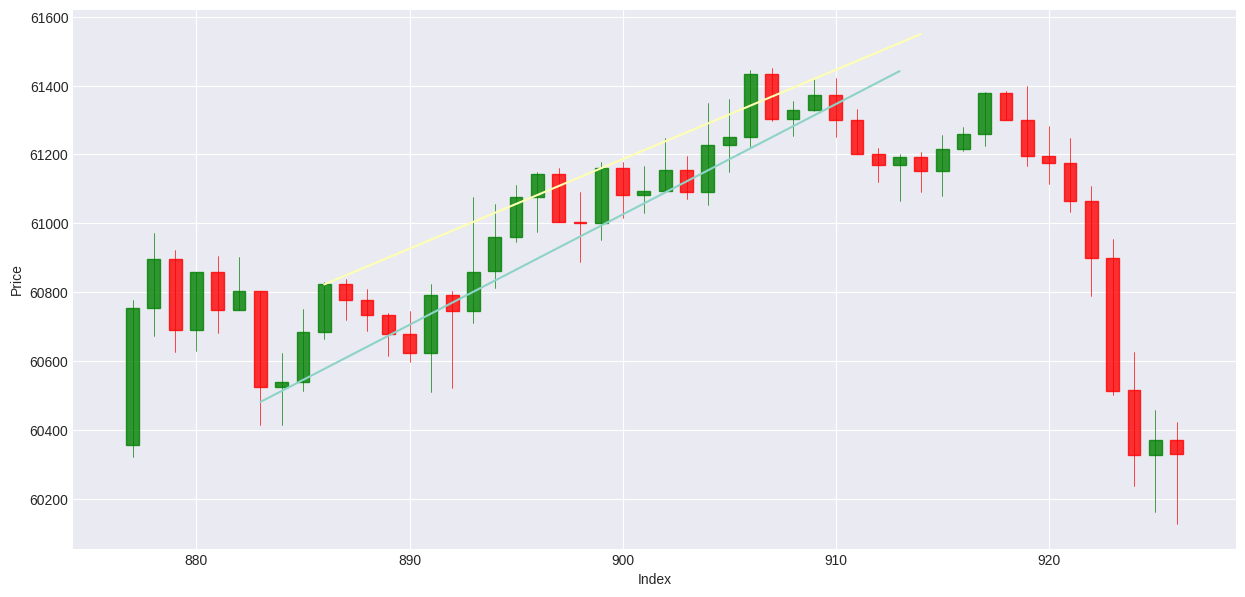

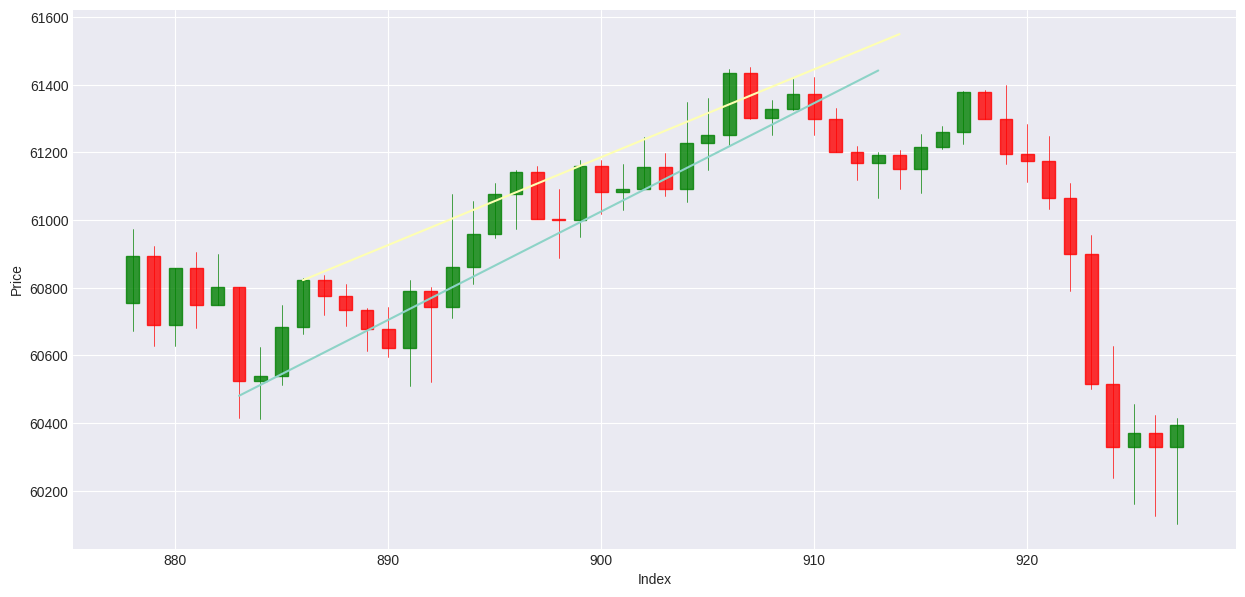

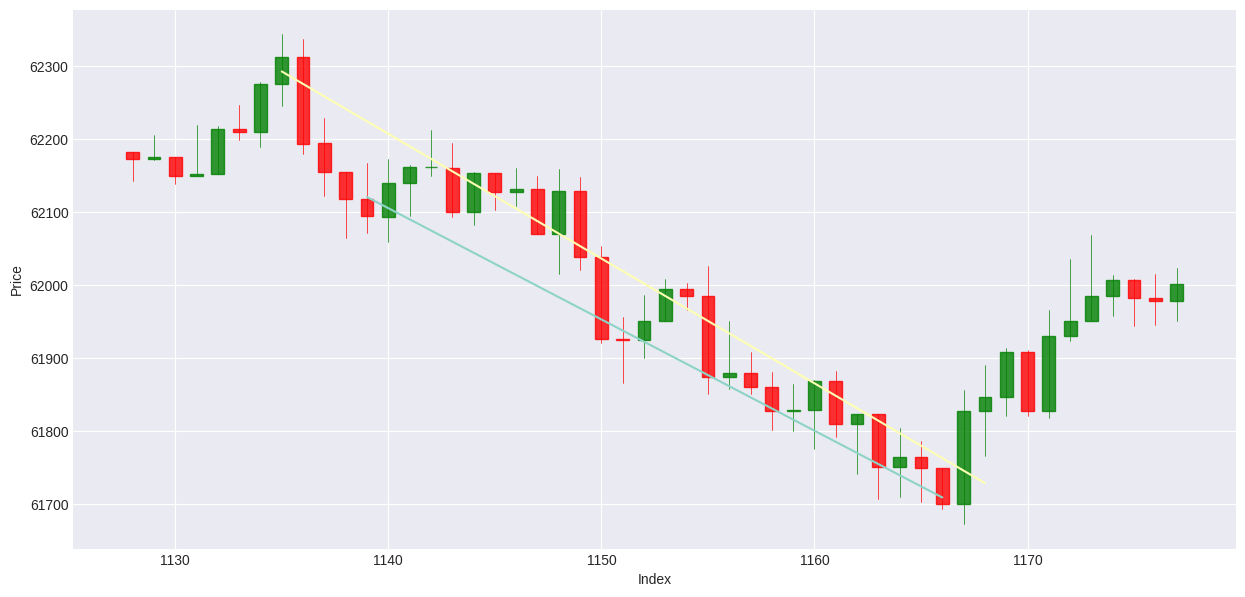

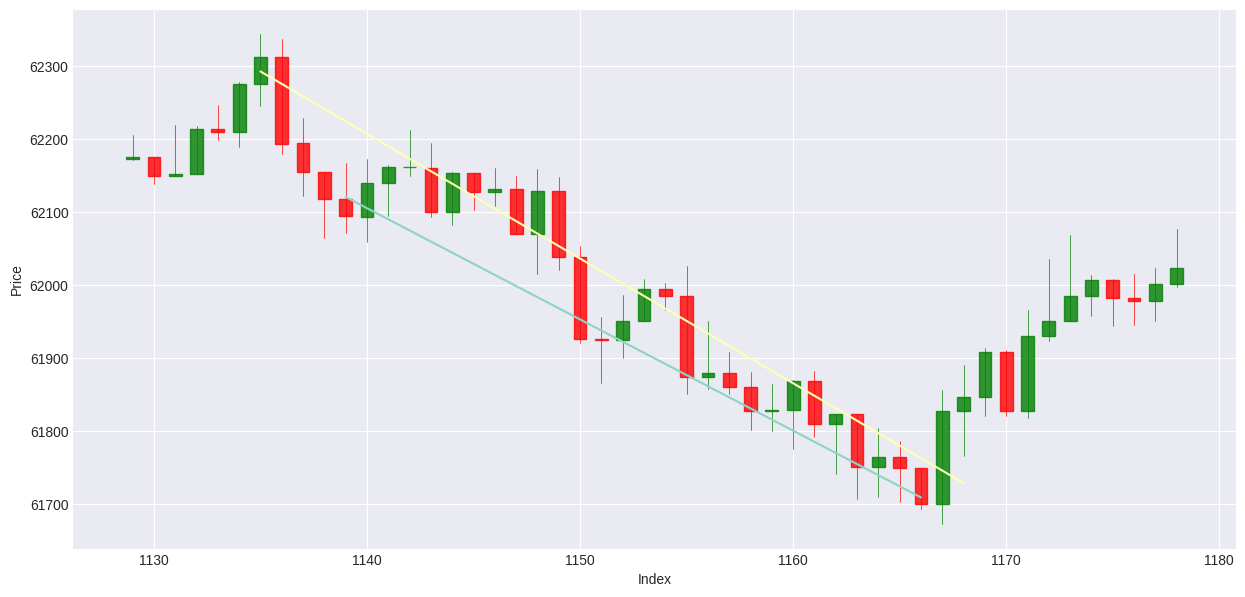

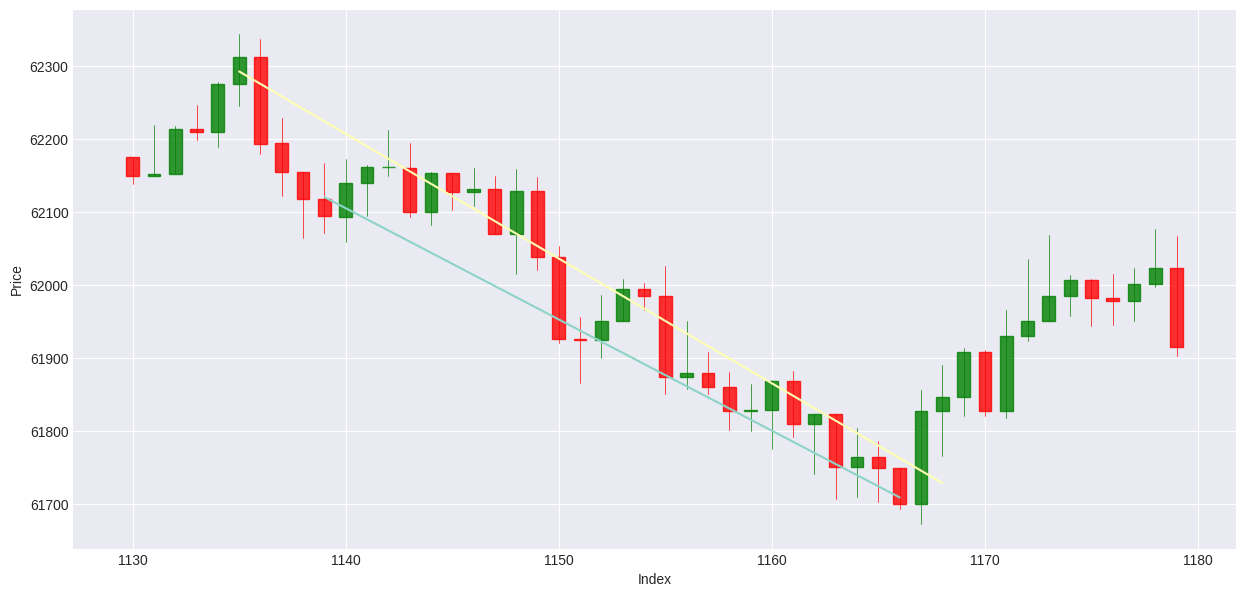

In [114]:
df["Pivot"] = 0

# Get the minimas and maximas 
df["Pivot"]    = df.apply(lambda x: pivot_id(df, x.name, 3, 3), axis=1)
df['PointPos'] = df.apply(lambda x: pivot_point_position(x), axis=1) # Used for visualising the pivot points


# Plot sample point positions
point_position_plot(df, 50, 200)

# Find all wedge pattern points
back_candles = 20
all_points   = find_wedge_points(df, back_candles)

# Plot the wedge pattern graphs
save_plot(df, all_points, back_candles)
